# Data Loading
Load the dataset, display basic information about the dataset including shape, columns, and data types. Show first few rows and basic statistics.

In [2]:
import pandas as pd

# Load the dataset
file_path = './marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t')

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:", df.columns.tolist())
print("\nData types of each column:\n", df.dtypes)

# Show the first few rows of the dataset
df.head()

# Display basic statistics of the dataset
df.describe(include='all')

Shape of the dataset: (2240, 29)

Columns in the dataset: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Data types of each column:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000


# Data Quality Assessment
Check for missing values, duplicates, outliers, and inconsistent values. Analyze data distributions and identify potential data quality issues.

In [8]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Check for outliers using IQR method
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

# Create a summary DataFrame
summary_df = pd.DataFrame({
  'Missing Values': missing_values,
  'Duplicate Rows': [duplicate_rows] + [0] * (len(missing_values) - 1),
  'Outliers': outliers
})

# Display the summary table
print("Data Quality Assessment Summary:")
summary_df


Data Quality Assessment Summary:


,Missing Values,Duplicate Rows,Outliers
AcceptedCmp1,0,0,144.0
AcceptedCmp2,0,0,30.0
AcceptedCmp3,0,0,163.0
AcceptedCmp4,0,0,167.0
AcceptedCmp5,0,0,163.0
Complain,0,0,21.0
Dt_Customer,0,0,NaN
Education,0,0,NaN
ID,0,0,0.0
Income,24,0,8.0


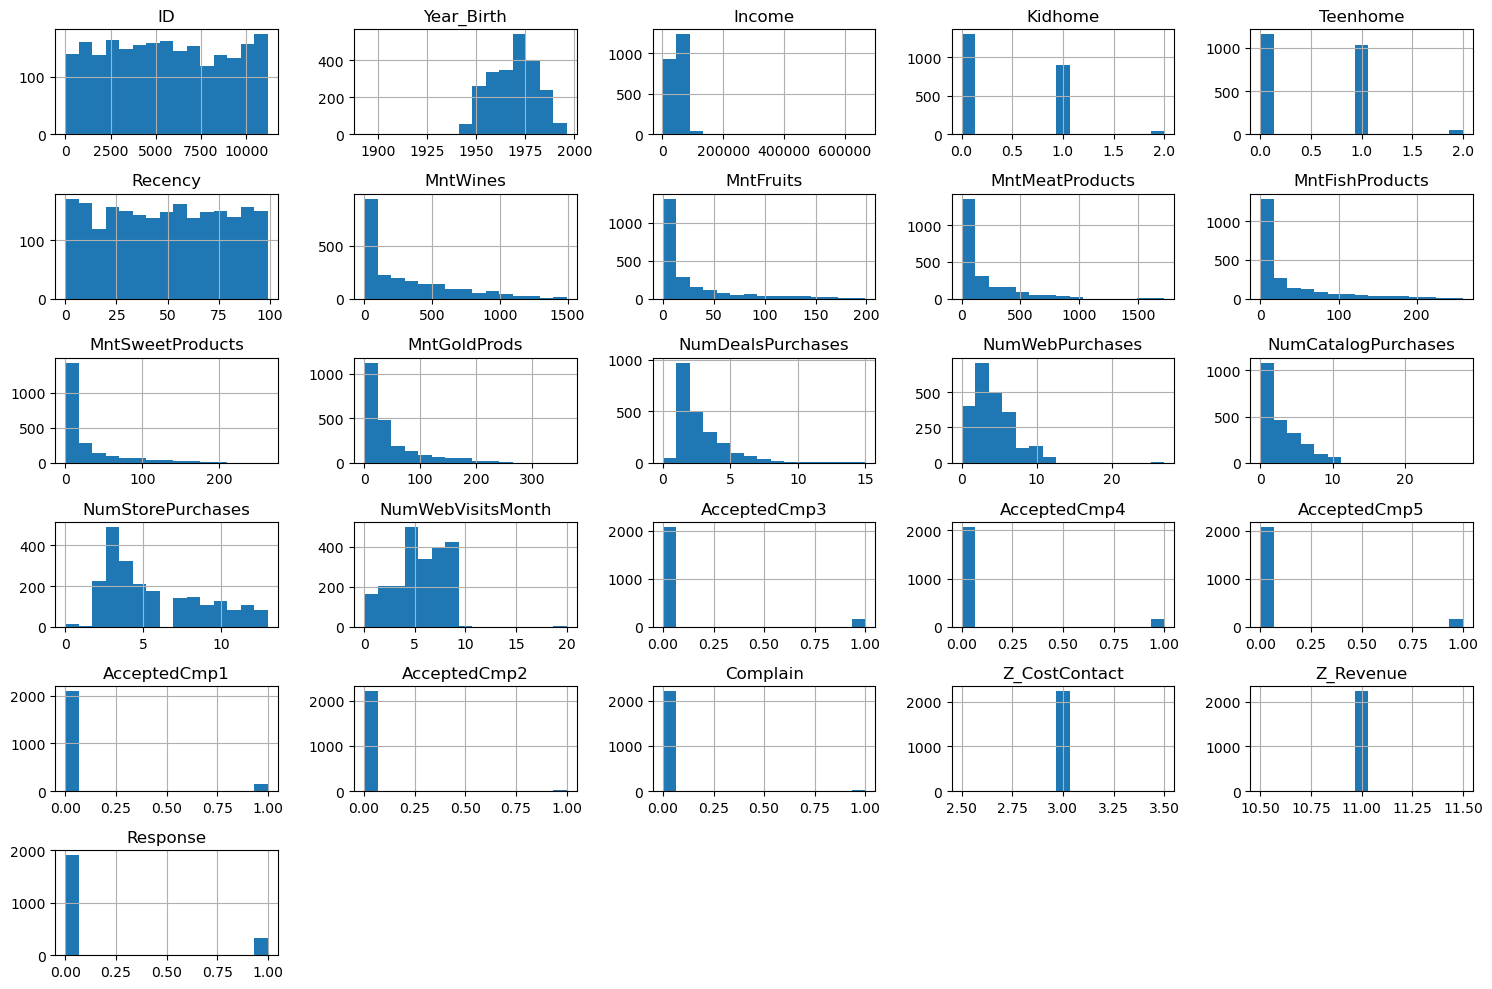

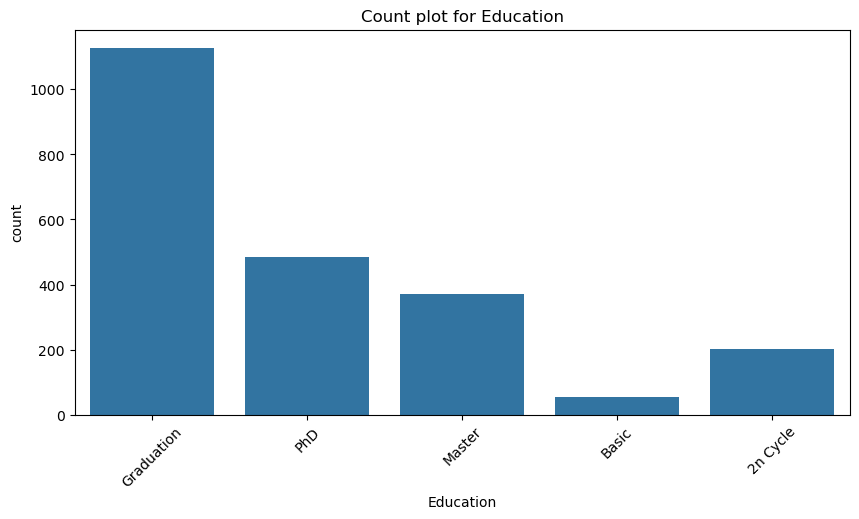

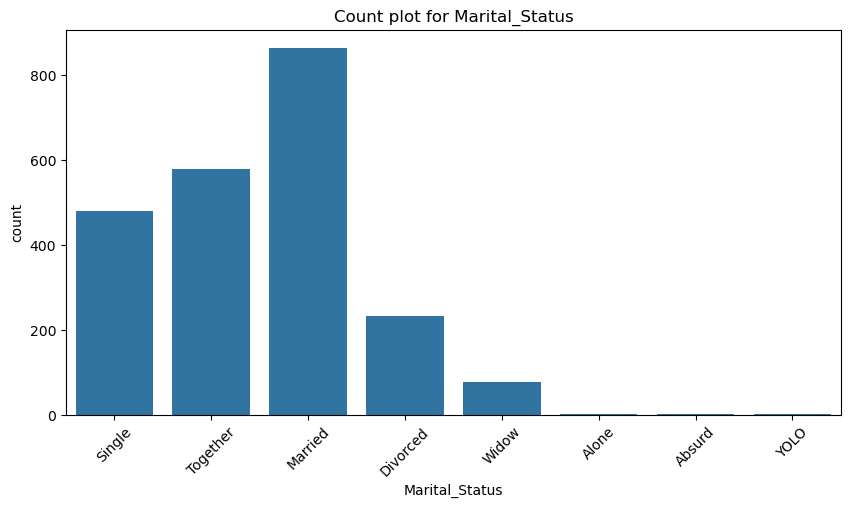

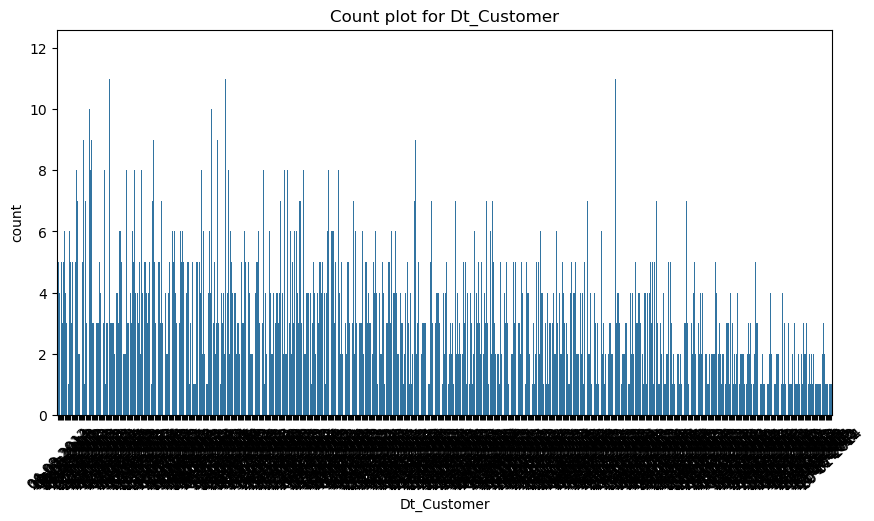

In [10]:
# Analyze data distributions
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for numerical columns
df[numerical_columns].hist(bins=15, figsize=(15, 10), layout=(6, 5))
plt.tight_layout()
plt.show()

# Plot count plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df, x=col)
    plt.title(f"Count plot for {col}")
    plt.xticks(rotation=45)
    plt.show()

# Data Cleaning and Transformation
Handle missing values, remove duplicates, fix data type issues, handle outliers. Convert date columns to datetime format. Create age column from Year_Birth.

In [11]:
# Handle missing values
df['Income'].fillna(df['Income'].median(), inplace=True)
df.dropna(subset=['Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer'], inplace=True)

# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Fix data type issues
df['Income'] = df['Income'].astype(float)

# Handle outliers by capping them
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

# Convert date columns to datetime format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Create age column from Year_Birth
current_year = pd.to_datetime('today').year
df['Age'] = current_year - df['Year_Birth']

# Display the cleaned dataset
print("Shape of the cleaned dataset:", df.shape)
print("\nColumns in the cleaned dataset:", df.columns.tolist())
print("\nData types of each column after cleaning:\n", df.dtypes)

# Show the first few rows of the cleaned dataset
df.head()

Shape of the cleaned dataset: (2240, 30)

Columns in the cleaned dataset: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age']

Data types of each column after cleaning:
 ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatP

/tmp/ipykernel_85591/4221700723.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,0,68
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,71
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,60
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,41
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,44


# Feature Engineering
Create new features like total spend, campaign response rate, shopping frequency, household size, and customer lifetime value metrics.

In [12]:
# Feature Engineering

# Create a new feature for total spend
df['Total_Spend'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Create a new feature for campaign response rate
df['Campaign_Response_Rate'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1) / 5

# Create a new feature for shopping frequency
df['Shopping_Frequency'] = df[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

# Create a new feature for household size
df['Household_Size'] = df['Kidhome'] + df['Teenhome'] + 1  # +1 for the customer

# Create a new feature for customer lifetime value (CLV)
df['Customer_Lifetime_Value'] = df['Total_Spend'] / ((pd.to_datetime('today') - df['Dt_Customer']).dt.days / 365)

# Display the new features
print("\nNew features added to the dataset:")
print(df[['Total_Spend', 'Campaign_Response_Rate', 'Shopping_Frequency', 'Household_Size', 'Customer_Lifetime_Value']].head())

# Display the updated dataset
print("\nShape of the dataset after feature engineering:", df.shape)
print("\nColumns in the dataset after feature engineering:", df.columns.tolist())


New features added to the dataset:
   Total_Spend  Campaign_Response_Rate  Shopping_Frequency  Household_Size  \
0       1551.5                     0.0                  25               1   
1         27.0                     0.0                   6               3   
2        776.0                     0.0                  21               1   
3         53.0                     0.0                   8               2   
4        422.0                     0.0                  19               2   

   Customer_Lifetime_Value  
0               123.862095  
1                 2.450273  
2                67.102582  
3                 4.778903  
4                37.845209  

Shape of the dataset after feature engineering: (2240, 35)

Columns in the dataset after feature engineering: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 

# Customer Segmentation Analysis
Use clustering algorithms to segment customers based on spending patterns, campaign responses, and demographic features. Identify high-value vs budget shoppers.

/Users/echooo/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/echooo/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/echooo/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/echooo/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

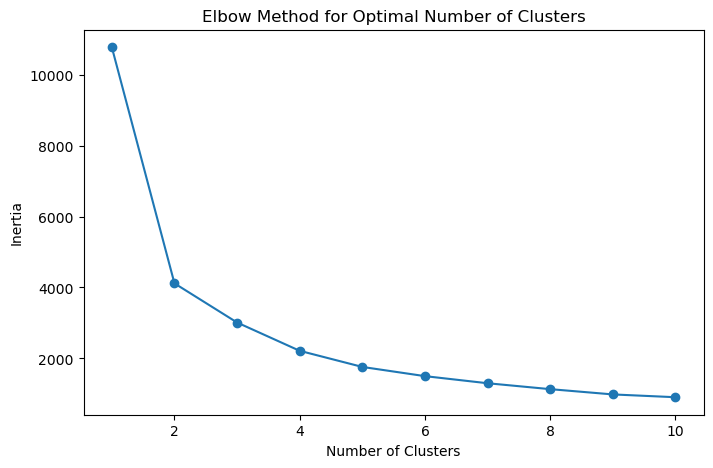

/Users/echooo/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


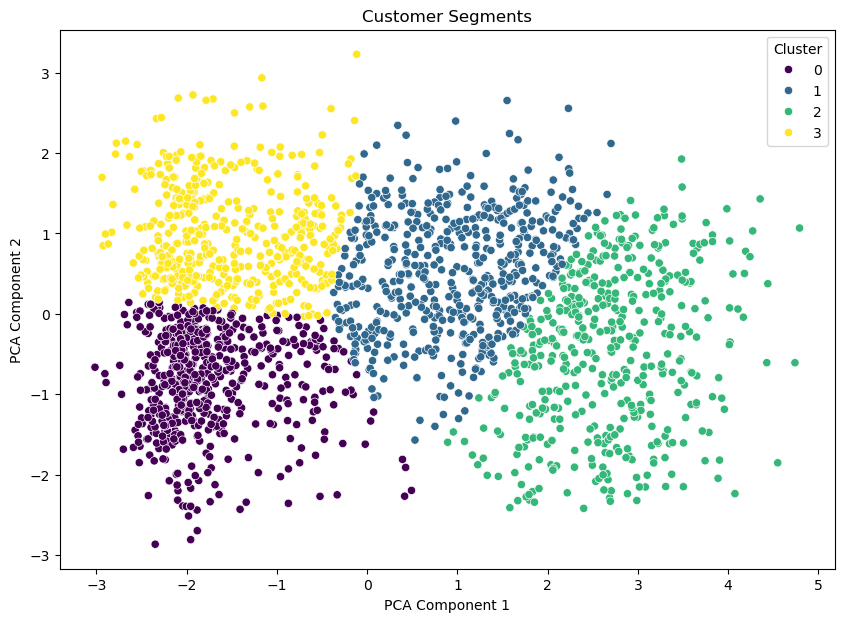


Cluster Summary:
          Total_Spend  Campaign_Response_Rate  Shopping_Frequency  \
Cluster                                                            
0         109.495448                     0.0            7.939302   
1         757.411664                     0.0           20.617496   
2        1366.880716                     0.0           21.510934   
3         144.471717                     0.0            9.767677   

         Household_Size  Customer_Lifetime_Value        Age        Income  
Cluster                                                                    
0              1.884674                 9.294013  46.981791  31291.907056  
1              1.977702                64.472383  61.682676  61911.089194  
2              1.212724               116.476408  54.739563  76688.412525  
3              2.755556                12.397132  63.262626  42201.526768  

Shape of the dataset after adding shopper type: (2240, 37)

Columns in the dataset after adding shopper type: ['ID'

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Z_Revenue,Response,Age,Total_Spend,Campaign_Response_Rate,Shopping_Frequency,Household_Size,Customer_Lifetime_Value,Cluster,Shopper_Type
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,11,0,68,1551.5,0.0,25,1,123.862095,2,Budget
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,11,0,71,27.0,0.0,6,3,2.450273,3,Budget
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,11,0,60,776.0,0.0,21,1,67.102582,1,High Value
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,11,0,41,53.0,0.0,8,2,4.778903,0,High Value
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,11,0,44,422.0,0.0,19,2,37.845209,1,High Value


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select features for clustering
features = ['Total_Spend', 'Campaign_Response_Rate', 'Shopping_Frequency', 'Household_Size', 'Customer_Lifetime_Value', 'Age', 'Income']
X = df[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Determine the optimal number of clusters using the elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Apply KMeans clustering with the optimal number of clusters
optimal_clusters = 4  # Assuming 4 is the optimal number from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_pca)

# Visualize the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Customer Segments')
plt.legend(title='Cluster')
plt.show()

# Analyze the characteristics of each cluster
cluster_summary = df.groupby('Cluster')[features].mean()
print("\nCluster Summary:\n", cluster_summary)

# Identify high-value vs budget shoppers
df['Shopper_Type'] = df['Cluster'].apply(lambda x: 'High Value' if x in [0, 1] else 'Budget')

# Display the updated dataset with shopper type
print("\nShape of the dataset after adding shopper type:", df.shape)
print("\nColumns in the dataset after adding shopper type:", df.columns.tolist())
df.head()

# Campaign Response Analysis
Analyze patterns in campaign responses, correlation with customer segments and purchasing behavior. Calculate response rates by segment.

Confusion Matrix:
 [[672]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       672

    accuracy                           1.00       672
   macro avg       1.00      1.00      1.00       672
weighted avg       1.00      1.00      1.00       672


Accuracy Score: 1.0

Response Rates by Shopper Type:
 Shopper_Type
Budget        0.0
High Value    0.0
Name: Response, dtype: float64


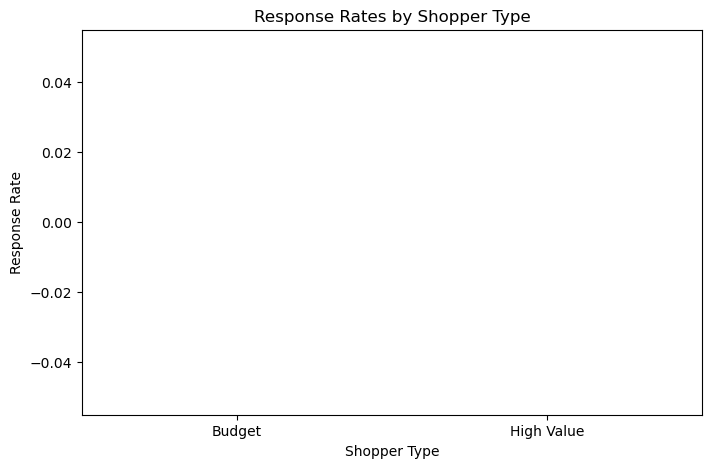


Feature Importances:
 Total_Spend                0.0
Campaign_Response_Rate     0.0
Shopping_Frequency         0.0
Household_Size             0.0
Customer_Lifetime_Value    0.0
Age                        0.0
Income                     0.0
dtype: float64


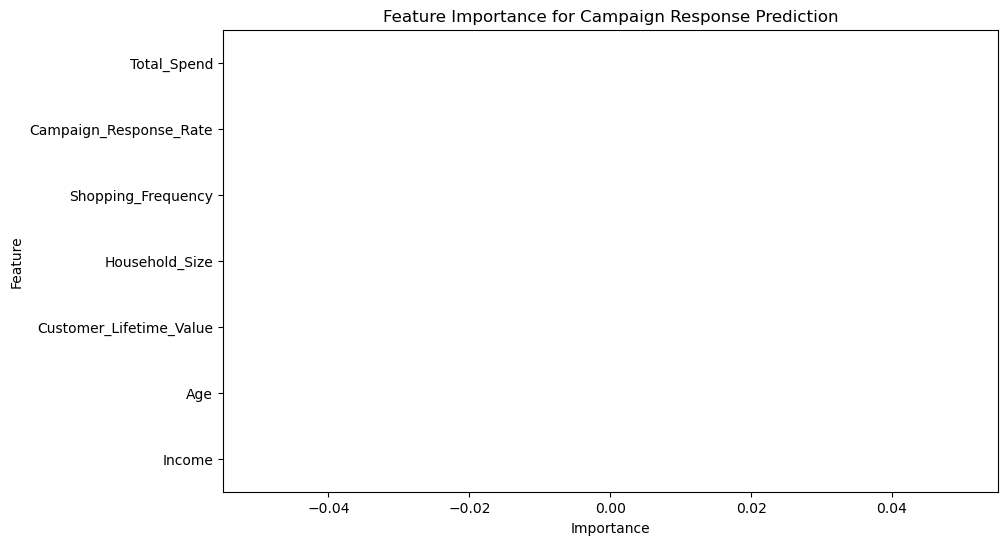

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define features and target variable for campaign response prediction
features = ['Total_Spend', 'Campaign_Response_Rate', 'Shopping_Frequency', 'Household_Size', 'Customer_Lifetime_Value', 'Age', 'Income']
target = 'Response'

# Split the data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Calculate response rates by shopper type
response_rates = df.groupby('Shopper_Type')['Response'].mean()
print("\nResponse Rates by Shopper Type:\n", response_rates)

# Visualize response rates by shopper type
plt.figure(figsize=(8, 5))
sns.barplot(x=response_rates.index, y=response_rates.values)
plt.xlabel('Shopper Type')
plt.ylabel('Response Rate')
plt.title('Response Rates by Shopper Type')
plt.show()

# Analyze feature importance
feature_importances = pd.Series(clf.feature_importances_, index=features).sort_values(ascending=False)
print("\nFeature Importances:\n", feature_importances)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Campaign Response Prediction')
plt.show()

# Predictive Modeling
Build and evaluate machine learning models to predict campaign responses using historical data. Compare model performance and identify key predictive features.

In [15]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve

# Define models to compare
models = {
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

# Evaluate models using cross-validation
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{model_name} CV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

# Hyperparameter tuning for the best model (RandomForest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best model after hyperparameter tuning
best_model = grid_search.best_estimator_
print("\nBest Model Parameters:", grid_search.best_params_)

# Evaluate the best model on the test set
y_pred_best = best_model.predict(X_test)
print("\nConfusion Matrix (Best Model):\n", confusion_matrix(y_test, y_pred_best))
print("\nClassification Report (Best Model):\n", classification_report(y_test, y_pred_best))
print("\nAccuracy Score (Best Model):", accuracy_score(y_test, y_pred_best))

# ROC AUC Score
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("\nROC AUC Score (Best Model):", roc_auc)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

RandomForest CV Accuracy: 1.0000 ± 0.0000


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/echooo/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/echooo/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1241, in fit
    raise ValueError(
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0
